In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Loading Data

In [2]:
hospital_readmission = pd.read_csv("hospital-readmission.csv")
entity_data = pd.read_csv("entity_data.csv")

# Data Cleaning

In [3]:
hospital_readmission.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_diagnoses,A1Cresult,insulin,change,diabetesMed,readmitted,ic9Groupname3,ic9Groupname2,physician_speciality,ic9Groupname
0,Caucasian,Female,10-20,1,1,7,3,59,0,18,...,9,None,Up,Ch,Yes,0,Neoplasms,Diabeties,Unknown,Neoplasms
1,Caucasian,Male,30-40,1,1,7,2,44,1,16,...,7,None,Up,Ch,Yes,0,Circulatory,Diabeties,Unknown,Circulatory
2,Caucasian,Female,80-90,2,1,4,13,68,2,28,...,8,None,Steady,Ch,Yes,0,Other,Circulatory,Unknown,Circulatory
3,AfricanAmerican,Female,40-50,1,1,7,9,47,2,17,...,9,None,Steady,No,Yes,0,Injury,Circulatory,Unknown,Diabeties
4,Caucasian,Female,40-50,1,3,7,7,60,0,15,...,8,None,Down,Ch,Yes,1,Diabeties,Diabeties,Family Practice,Circulatory


In [4]:
hospital_readmission.dtypes

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
A1Cresult                   object
insulin                     object
change                      object
diabetesMed                 object
readmitted                   int64
ic9Groupname3               object
ic9Groupname2               object
physician_speciality        object
ic9Groupname                object
dtype: object

#### Check columns which we will be using for later analysis

In [5]:
hospital_readmission["race"].unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [6]:
hospital_readmission["gender"].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [7]:
# Drop records with unknown gender
hospital_readmission = hospital_readmission[hospital_readmission["gender"] != "Unknown/Invalid"]

In [8]:
hospital_readmission["readmitted"].unique()

array([0, 1])

In [9]:
hospital_readmission["age"].unique()

array(['10-20', '30-40', '80-90', '40-50', '60-70', '50-60', '70-80',
       '90-100', '20-30', '0-10', '20-Oct'], dtype=object)

In [10]:
# Remove age that doesn't align with the format year-year
hospital_readmission = hospital_readmission[hospital_readmission["age"] != "20-Oct"]

In [11]:
entity_data.head()

,id,name,year,gender,lon,lat,number,street,city,postcode,state,email,home_phone,mobile_phone
0,0,george washington,1970,M,-77.229632,38.752401,7446,RIDGE RD,springfield,22153,va,washingtonjrjb598@yahoo.com,9383374259,2438766108
1,0,ashington g,1969,M,-77.229632,38.752401,7446,IDGE RD,springfield,22153,va,washingtonjrjb598@yahoo.com,9383374259,2438766108
2,0,washington george,1970,M,-77.229632,38.752401,7446,RIDGE RD,springfield,22153,va,washingtonjrjb598@yahoo.com,9383374259,2438766108
3,0,g washington,1967,M,-77.229632,38.752401,7446,RIDG RD,springfield,22153,va,washingtonjrjb598@yahoo.com,9383374259,2438766108
4,1,douglas adams,1961,M,-94.586227,39.073195,2933,BALTIMORE AVE,kansas city,64108,mo,tkls161727n6400s700r@gmail.com,3417265516,4685339969


In [12]:
entity_data.dtypes

id                int64
name             object
year              int64
gender           object
lon             float64
lat             float64
number           object
street           object
city             object
postcode         object
state            object
email            object
home_phone        int64
mobile_phone      int64
dtype: object

In [13]:
sorted(entity_data["year"].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 169,
 170,
 171,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 967,
 968,
 969,
 970,
 971,
 972,
 973,
 974,
 975,
 976,
 977,
 978,
 979,
 980,
 981,
 982,
 983,
 984,
 985,
 986,
 987,
 988,
 989,
 990,
 991,
 992,
 993,
 994,
 995,
 996,
 997,
 998,
 999,
 1591,
 1592,
 1593,
 1594,
 1595,
 1596,
 1597,
 1598,
 1599,
 1690,
 1691,
 1692,
 1693,
 1694,
 1695,
 1696,
 1697,
 1698,
 1699,
 1790,
 1791,
 1792,
 1793,
 1794,
 1795,
 1796,
 1797,
 1798,
 1799,
 1890,
 1891,
 1892,
 1893,
 1894,
 1895,
 1896,
 1897,
 1898,
 1899,
 1906,
 1907,
 1908,
 1909,
 1915,
 1916,
 1917,
 1918,
 

In [14]:
entity_data["gender"].unique()

array(['M', 'F'], dtype=object)

In [15]:
entity_data["state"].unique()

array(['va', 'mo', 'wv', 'tx', 'oh', 'ca', 'in', 'az', 'or', 'ok', 'la',
       'ks', 'ny', 'ma', 'ut', 'wi', 'wa', 'il', 'ia', 'sc', 'mi', 'ri',
       'nc', 'ky', 'co', 'ne', 'md', 'pa', 'vt', 'nj', 'ak', 'sd', 'mn',
       'ms', 'nh', 'mt', 'tn', 'id', 'nd', 'ct', 'nv', 'nm', 'hi'],
      dtype=object)

#### We can find in entity_data, there are some duplicate records, we can drop_duplicate by checking if they have the same postcode, state, email, home_phone, and mobile_phone, and keep the first.

In [16]:
entity_data = entity_data.drop_duplicates(
    subset=["postcode", "state", "email", "home_phone", "mobile_phone"], keep="first")

In [17]:
# Remove records with year value larger than current year and less than 1900
entity_data = entity_data[
    (entity_data["year"] <= datetime.now().year) &
    (entity_data["year"] >= 1900)
]

# Data preparation

In [18]:
hospital_readmission.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_diagnoses,A1Cresult,insulin,change,diabetesMed,readmitted,ic9Groupname3,ic9Groupname2,physician_speciality,ic9Groupname
0,Caucasian,Female,10-20,1,1,7,3,59,0,18,...,9,None,Up,Ch,Yes,0,Neoplasms,Diabeties,Unknown,Neoplasms
1,Caucasian,Male,30-40,1,1,7,2,44,1,16,...,7,None,Up,Ch,Yes,0,Circulatory,Diabeties,Unknown,Circulatory
2,Caucasian,Female,80-90,2,1,4,13,68,2,28,...,8,None,Steady,Ch,Yes,0,Other,Circulatory,Unknown,Circulatory
3,AfricanAmerican,Female,40-50,1,1,7,9,47,2,17,...,9,None,Steady,No,Yes,0,Injury,Circulatory,Unknown,Diabeties
4,Caucasian,Female,40-50,1,3,7,7,60,0,15,...,8,None,Down,Ch,Yes,1,Diabeties,Diabeties,Family Practice,Circulatory


In [19]:
hospital_readmission["race"] = hospital_readmission["race"].fillna("other")

In [20]:
ic9_cols = ["ic9Groupname", "ic9Groupname2","ic9Groupname3",]

# Get unique values from ["ic9Groupname", "ic9Groupname2","ic9Groupname3",]
ic9Groupname_values = list(pd.unique(hospital_readmission[ic9_cols].values.ravel('K')))

# Create ID for  ["ic9Groupname", "ic9Groupname2","ic9Groupname3",]
for i in range(len(ic9Groupname_values)):
    hospital_readmission = hospital_readmission.apply(pd.Series.replace, to_replace=ic9Groupname_values[i], value=int(i))
    
# Change column type to category
for col in ic9_cols:
    hospital_readmission[col] = hospital_readmission[col].astype('category')

# Data Analysis

### 1. What percentage of Asian Male are readmitted?

In [21]:
percentReadmitAsianMale = hospital_readmission[
    (hospital_readmission["race"] == "Asian") & 
    (hospital_readmission["readmitted"] == 1) &
    (hospital_readmission["gender"] == "Male")
].shape[0] / hospital_readmission.shape[0]

print("Percentage of Asian Male are readmitted {}%".format(percentReadmitAsianMale*100))

Percentage of Asian Male are readmitted 0.13809679425686003%


### 2. Show percentage of people readmitted by race and gender

In [22]:
def calc_readmit_percent(col_name):
    values = list(hospital_readmission[col_name].unique())
    percentReadmit = []

    for value in values:
        hr_col = hospital_readmission[hospital_readmission[col_name] == value]
        total_num = hr_col.shape[0]
        num_readmit = hr_col[hr_col["readmitted"] == 1].shape[0]
        percentReadmit.append(num_readmit/total_num*100)
    
    return (values, percentReadmit)

Text(0, 0.5, 'percent of readmitted')

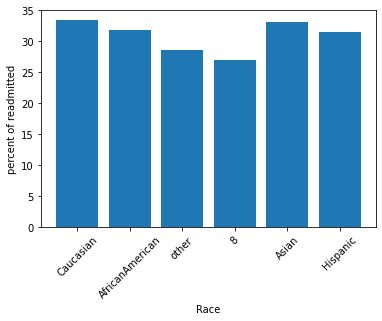

In [23]:
hospital_readmission["race"] = hospital_readmission["race"].astype("str")
race_result = calc_readmit_percent("race")
plt.bar(race_result[0], race_result[1])
plt.xticks(rotation = 45)
plt.xlabel("Race")
plt.ylabel("percent of readmitted")

Text(0, 0.5, 'percent of readmitted')

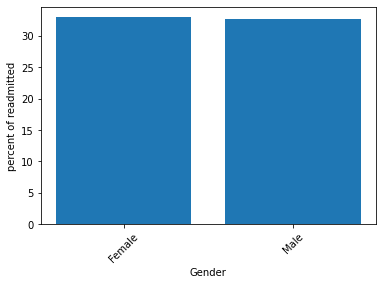

In [24]:
gender_result = calc_readmit_percent("gender")
plt.bar(gender_result[0], gender_result[1])
plt.xticks(rotation = 45)
plt.xlabel("Gender")
plt.ylabel("percent of readmitted")

### 3. Show percentage of people readmitted by age

Text(0, 0.5, 'percent of readmitted')

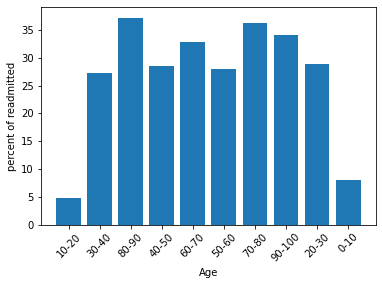

In [25]:
age_result = calc_readmit_percent("age")
plt.bar(age_result[0], age_result[1])
plt.xticks(rotation = 45)
plt.xlabel("Age")
plt.ylabel("percent of readmitted")

### 4. Show what percentage of ic9Groupname = “Circulatory” are readmitted?

In [26]:
index = ic9Groupname_values.index("Circulatory")

percentReadmitCirculatory = hospital_readmission[
    (hospital_readmission["ic9Groupname"] == index) & 
    (hospital_readmission["readmitted"] == 1)
].shape[0] / hospital_readmission.shape[0]

print("Percentage of ic9Groupname = “Circulatory” are readmitted {}%".format(percentReadmitCirculatory*100))

Percentage of ic9Groupname = “Circulatory” are readmitted 11.452546357301737%


# Entity_data.csv
### Count the number of users by year?

In [27]:
entity_data.head()

,id,name,year,gender,lon,lat,number,street,city,postcode,state,email,home_phone,mobile_phone
0,0,george washington,1970,M,-77.229632,38.752401,7446,RIDGE RD,springfield,22153,va,washingtonjrjb598@yahoo.com,9383374259,2438766108
4,1,douglas adams,1961,M,-94.586227,39.073195,2933,BALTIMORE AVE,kansas city,64108,mo,tkls161727n6400s700r@gmail.com,3417265516,4685339969
7,2,george w bush,1952,M,-81.080844,37.996727,4069,GATEWOOD RD,fayetteville,25840,wv,bushbush329ht958@outlok.com,844832634,6834559975
8,2,george bush,1952,M,-81.080844,37.996727,40069,GATEWOOD RD,fayetteville,25840,wv,bushbush329ht958@outlook.com,844832634,6834559975
9,2,president bush,1952,M,-81.080844,37.996727,4069,GATEWOOD RD,fayetteville,25840,wv,bushbush329ht958@outlook.com,8448832634,6834559975


In [28]:
print(entity_data.groupby("year").size())

year
1906      5
1907     14
1908     18
1909      6
1915     33
       ... 
2014    244
2015    175
2016     66
2017     19
2020      6
Length: 95, dtype: int64


### Count the number of users by year and gender?

In [29]:
print(entity_data.groupby(["year", "gender"]).size())

year  gender
1906  M          5
1907  F          2
      M         12
1908  F          1
      M         17
                ..
2016  M         37
2017  F          9
      M         10
2020  F          3
      M          3
Length: 185, dtype: int64


### Count the number of users by State?

In [30]:
print(entity_data.groupby(["state"]).size())

state
ak     1120
az    16399
ca    63945
co    12449
ct      203
hi        5
ia      864
id      516
il    11973
in     2836
ks     9375
ky     4483
la     6812
ma    14161
md     5361
mi     8281
mn     6968
mo    10709
ms      505
mt     1648
nc     8403
nd      912
ne     3189
nh     1656
nj     5662
nm        9
nv       20
ny    14823
oh    17838
ok     4912
or    10616
pa     3199
ri     1650
sc     2864
sd      806
tn     3821
tx    46940
ut     3192
va    17448
vt      610
wa    11221
wi     7571
wv     1072
dtype: int64


### Top ten zip codes with the highest population.

In [31]:
print(entity_data.groupby(["state"]).size().sort_values(ascending=False)[:10])

state
ca    63945
tx    46940
oh    17838
va    17448
az    16399
ny    14823
ma    14161
co    12449
il    11973
wa    11221
dtype: int64
